In [ ]:
# COTTON_LEAF_PREDICTION_MODEL

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir='/content/COTTON/train'
val_dir='/content/ COTTON/Validation'
test_dir='/content/ COTTON/test'

In [6]:
#IMAGE DIMENSION  AND BATCHSIZE

In [7]:
img_width,img_height=250,250

batch_size=32

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_datagenerator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=batch_size,
    class_mode="categorical"

)

Found 1951 images belonging to 4 classes.


In [15]:
validation_datagenerator=validation_datagen.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 324 images belonging to 4 classes.


In [38]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),


    Flatten(),

    Dense(512,activation='relu'),
    Dense(4,activation="softmax")


])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 29, 29, 64)       

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # For multi-class classification
              metrics=['accuracy'])

In [41]:
history=model.fit(
    train_datagenerator,
    steps_per_epoch=train_datagenerator.samples//batch_size,
    epochs=10,
    validation_data=validation_datagenerator,
    validation_steps=validation_datagenerator.samples//batch_size)


Epoch 1/10
60/60 [==============================] - 31s 477ms/step - loss: 1.4487 - accuracy: 0.4581 - val_loss: 1.1113 - val_accuracy: 0.4281
Epoch 2/10
60/60 [==============================] - 32s 526ms/step - loss: 1.0158 - accuracy: 0.5758 - val_loss: 1.0500 - val_accuracy: 0.4656
Epoch 3/10
60/60 [==============================] - 29s 482ms/step - loss: 0.9701 - accuracy: 0.6050 - val_loss: 0.9271 - val_accuracy: 0.6031
Epoch 4/10
60/60 [==============================] - 30s 499ms/step - loss: 0.9466 - accuracy: 0.6191 - val_loss: 0.9367 - val_accuracy: 0.5781
Epoch 5/10
60/60 [==============================] - 29s 489ms/step - loss: 0.9112 - accuracy: 0.6321 - val_loss: 0.8518 - val_accuracy: 0.6750
Epoch 6/10
60/60 [==============================] - 31s 515ms/step - loss: 0.8777 - accuracy: 0.6394 - val_loss: 1.0282 - val_accuracy: 0.4781
Epoch 7/10
60/60 [==============================] - 29s 491ms/step - loss: 0.8341 - accuracy: 0.6623 - val_loss: 0.7207 - val_accuracy: 0.7344

In [42]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [43]:
test_datagenerator=validation_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 18 images belonging to 4 classes.


In [44]:
test_loss, test_accuracy = model.evaluate(test_datagenerator)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 212ms/step - loss: 0.2525 - accuracy: 0.9444
Test Accuracy: 0.9444444179534912


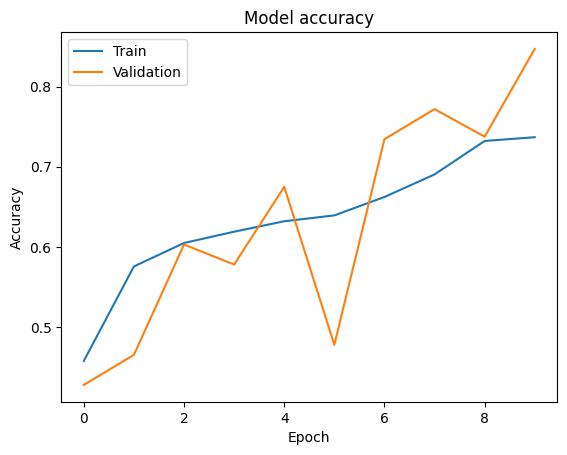

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



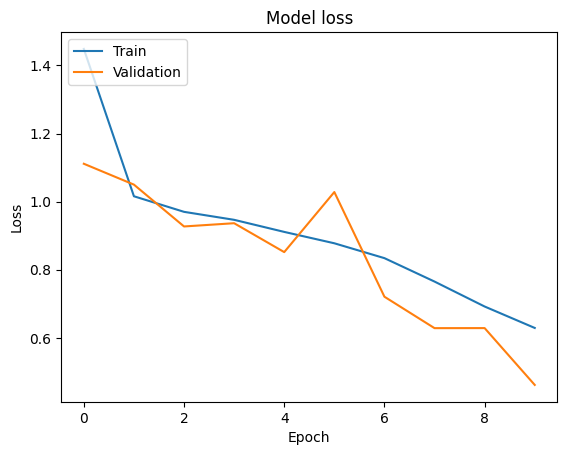

In [46]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

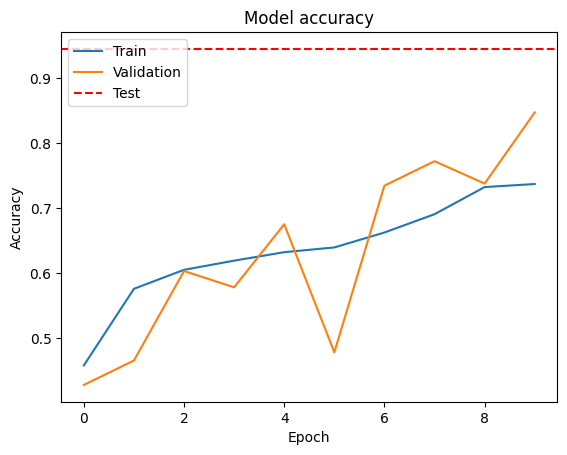

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()



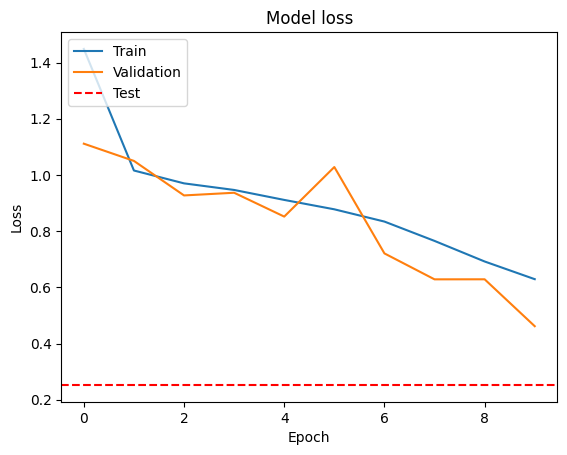

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()